In [21]:
import pandas as pd
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt
from math import sqrt
from sktime.utils.plotting import plot_series
import warnings
warnings.filterwarnings('ignore')

In [2]:
gdp_df=pd.read_csv('gdp-per-capita-ppp-constant-2011.csv',index_col=0)

In [3]:
gdp_df

,"GDP per capita, PPP (constant 2011 international $)"
Year,
1990,1754.857
1991,1737.615
1992,1796.532
1993,1845.149
1994,1930.113
1995,2036.796
1996,2149.366
1997,2194.903
1998,2288.048


In [4]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28 entries, 1990 to 2017
Data columns (total 1 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   GDP per capita, PPP (constant 2011 international $)  28 non-null     float64
dtypes: float64(1)
memory usage: 448.0 bytes


In [5]:
gdp_df.index=pd.PeriodIndex(gdp_df.index,freq="Y")

In [6]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 28 entries, 1990 to 2017
Freq: A-DEC
Data columns (total 1 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   GDP per capita, PPP (constant 2011 international $)  28 non-null     float64
dtypes: float64(1)
memory usage: 448.0 bytes


In [7]:
y=gdp_df['GDP per capita, PPP (constant 2011 international $)']

In [8]:
y_train=y[:-3]
y_test=y[-3:]

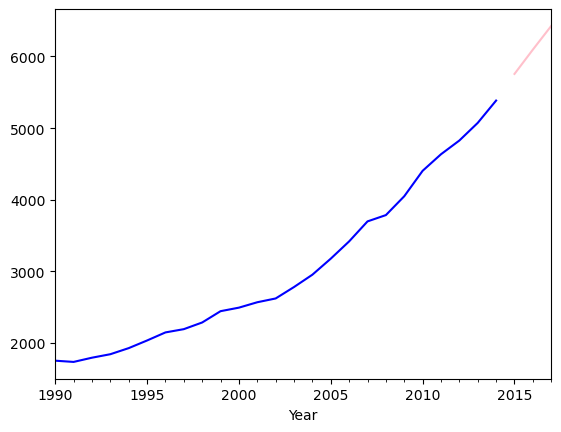

In [9]:
y_train.plot(color='blue',label='train')
y_test.plot(color='pink',label='test')
plt.show()

In [10]:
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=269.043, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=268.855, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=268.997, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=265.836, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=267.744, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=267.579, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=269.313, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.341 seconds


In [11]:
model = auto_arima(y_train, trace=True, error_action='ignore', 
                  suppress_warnings=True,seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=272.864, Time=0.39 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=268.855, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=270.904, Time=0.06 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=267.819, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=265.836, Time=0.02 sec
 ARIMA(0,2,1)(1,0,0)[12]             : AIC=267.819, Time=0.05 sec
 ARIMA(0,2,1)(1,0,1)[12]             : AIC=inf, Time=0.19 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=267.744, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[12]             : AIC=267.579, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=268.997, Time=0.02 sec
 ARIMA(1,2,2)(0,0,0)[12]             : AIC=269.313, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.04 sec

Best model:  ARIMA(0,2,1)(0,0,0)[12]          
Total fit time: 0.959 seconds


In [12]:
forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

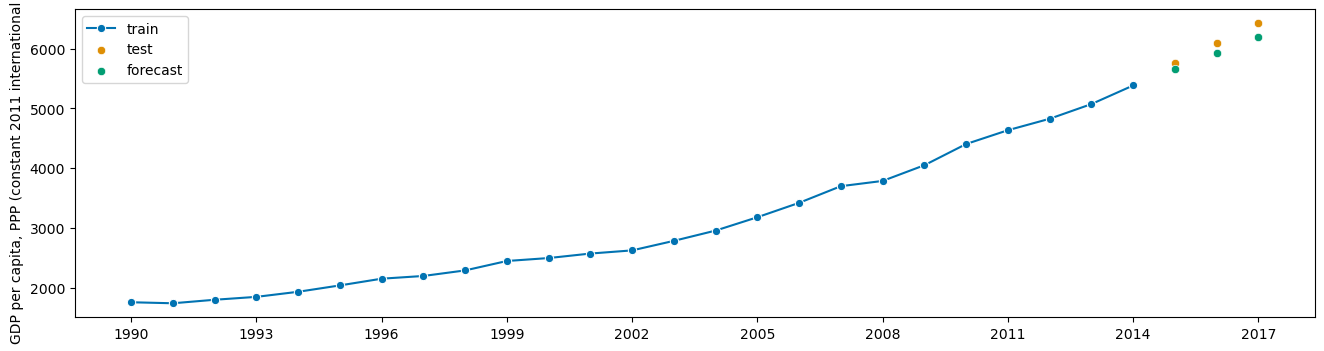

In [22]:
plot_series(y_train,y_test,forecast,labels=['train','test','forecast'])
plt.show()

In [23]:
# plt.plot(y_train, label='Train',color="blue")
# plt.plot(y_test, label='Valid',color="pink")
# plt.plot(forecast, label='Prediction',color="purple")
# plt.legend(loc='best')
# plt.show()

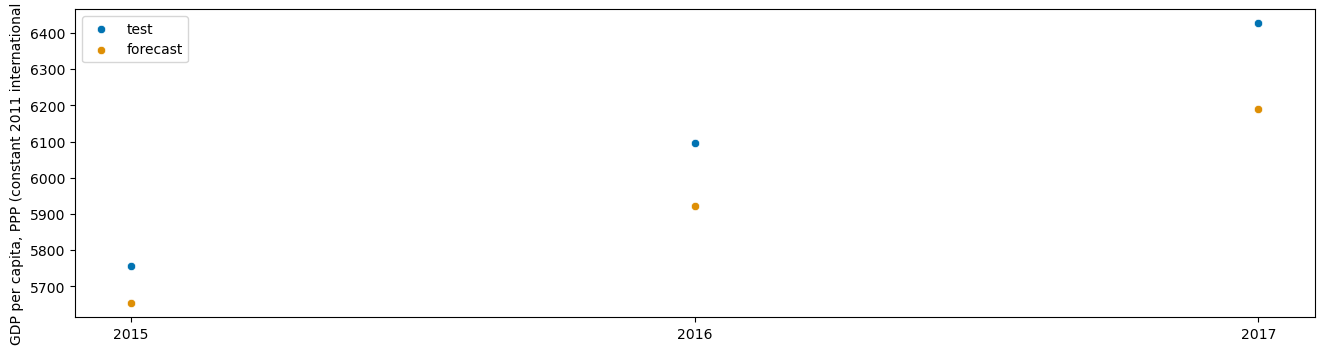

In [24]:
plot_series(y_test,forecast,labels=['test','forecast'],)
plt.show()

In [25]:
# #plotting the result
# plt.plot(y_test)
# plt.plot(forecast, color='red')
# plt.show()

In [26]:
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 179.509


In [27]:
#Building the data on the whole data

In [28]:
model = auto_arima(y, trace=True, error_action='ignore', 
                   suppress_warnings=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[12]             : AIC=inf, Time=0.31 sec
 ARIMA(0,2,0)(0,0,0)[12]             : AIC=301.294, Time=0.01 sec
 ARIMA(1,2,0)(1,0,0)[12]             : AIC=303.598, Time=0.02 sec
 ARIMA(0,2,1)(0,0,1)[12]             : AIC=300.782, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[12]             : AIC=299.039, Time=0.02 sec
 ARIMA(0,2,1)(1,0,0)[12]             : AIC=300.815, Time=0.05 sec
 ARIMA(0,2,1)(1,0,1)[12]             : AIC=inf, Time=0.20 sec
 ARIMA(1,2,1)(0,0,0)[12]             : AIC=300.739, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[12]             : AIC=300.410, Time=0.03 sec
 ARIMA(1,2,0)(0,0,0)[12]             : AIC=301.598, Time=0.01 sec
 ARIMA(1,2,2)(0,0,0)[12]             : AIC=302.234, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[12] intercept   : AIC=inf, Time=0.05 sec

Best model:  ARIMA(0,2,1)(0,0,0)[12]          
Total fit time: 0.841 seconds


In [29]:
import numpy as np
forecast = model.predict(n_periods=12)
# forecast = pd.DataFrame(forecast,index = np.arange(y.shape[0]+1,y.shape[0]+7),
#                         columns=['Prediction'])
forecast

2018     6757.142767
2019     7087.611534
2020     7418.080301
2021     7748.549068
2022     8079.017835
2023     8409.486602
2024     8739.955370
2025     9070.424137
2026     9400.892904
2027     9731.361671
2028    10061.830438
2029    10392.299205
Freq: A-DEC, dtype: float64

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='GDP per capita, PPP (constant 2011 international $)'>)

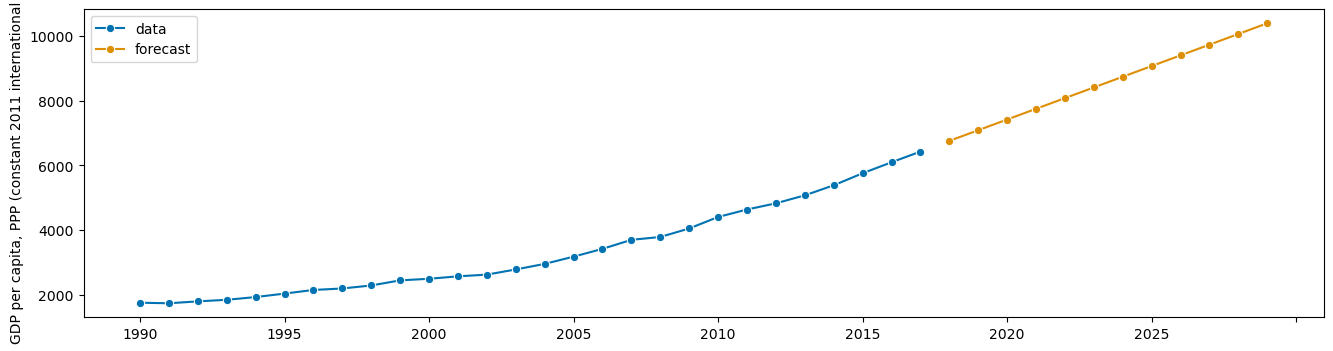

In [31]:
plot_series(y,forecast,labels=['data','forecast'])

In [32]:
# #plot the predictions for validation set
# plt.plot(y, label='Train',color="pink")
# plt.plot(forecast, label='Prediction',color="blue")
# plt.show()